fashion_mnist - наш датасет

Sequential - модель нейронной сети, где слои идут друг за другом

Dense - слои полносвязанные

Dropout -

utils - перевод данных

In [2]:
from tensorflow.python.framework.indexed_slices import IndexedSlicesCompositeTensorGradient
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

x_train - обучающая выборка

x_test - тестовая выборка

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x_train[0] - изображение нашей обучающей выборки

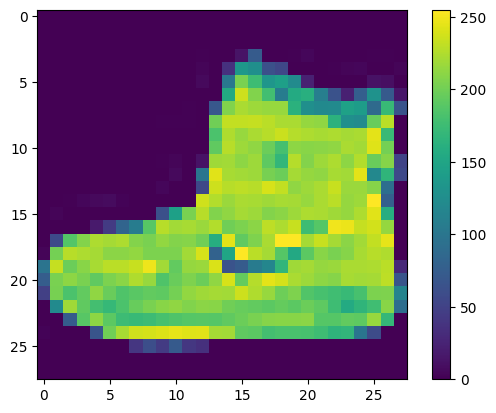

In [5]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

производим нормализацию данных (от 0 до 1)

In [6]:
x_train = x_train / 255
x_test = x_test / 255

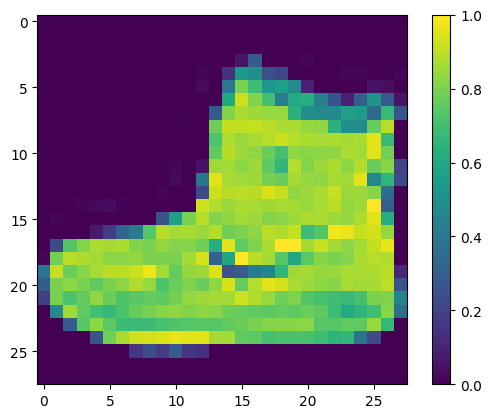

In [7]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

выведем несколько пикч

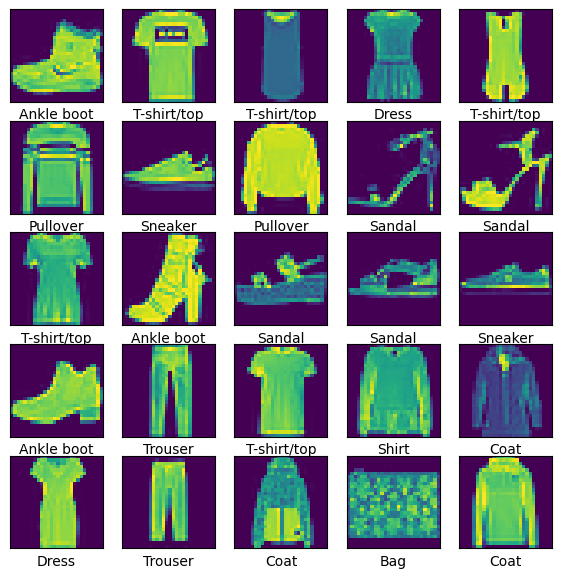

In [45]:
plt.figure(figsize=(7,7))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])

Создадим модель, состоящуюю из нескольких последовательных слоёв

Flatten - преобразует массив в строку (массив 28 на 28 пикселей)

Dense:

1) слой из 128 нейронов, используем функцию активации (y = x)

2) выходной нейрон по количеству классов, функция активации - softmax (массив из 10 вероятностных оценок, сумма равна 1, каждый нейрон содержит оценку, которая указывает вероятность что текущее изображение принадлежит одному из классов)

In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

компиляция  модели

In [47]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

напечатаем параметры:

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


обучение с учителем, обучение происходит с модулем fit

In [49]:
model.fit(x_train, y_train, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7311 - accuracy: 0.7630
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5112 - accuracy: 0.8254
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4668 - accuracy: 0.8393
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4425 - accuracy: 0.8465
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4252 - accuracy: 0.8532
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4109 - accuracy: 0.8580
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3997 - accuracy: 0.8612
Epoch 8/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3904 - accuracy: 0.8646
Epoch 9/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3806 - accuracy: 0.8671
Epoch 10/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.372

In [50]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3576 - accuracy: 0.8730
Test accuracy: 0.8730000257492065


предсказываем

In [51]:
predictions = model.predict(x_train)

1875/1875 [==============================] - 3s 2ms/step


In [52]:
predictions[8]

array([4.6428708e-05, 2.2721153e-07, 8.1333410e-06, 8.6160071e-07,
       3.9668362e-07, 9.9970895e-01, 1.9892109e-06, 8.1396291e-05,
       3.7011052e-06, 1.4789667e-04], dtype=float32)

In [67]:
np.argmax(predictions[8])

5

In [68]:
i = 8
print('num: ', y_train[i])

num:  5


In [69]:
class_names[np.argmax(predictions[8])]

'Sandal'

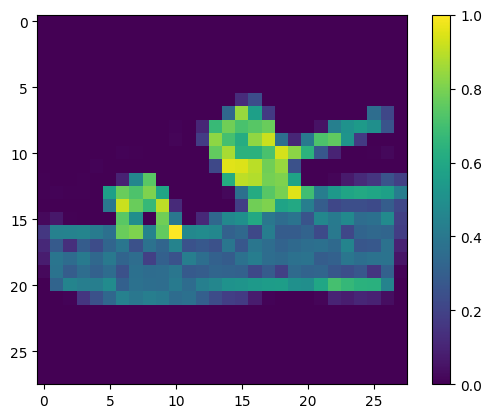

In [70]:
plt.figure()
plt.imshow(x_train[12])
plt.colorbar()
plt.grid(False)